## Import Modules

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

sns.set()

## Initialize and Load Data

In [6]:
customer = pd.read_csv('dataset/customer.csv')
customer

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the Data

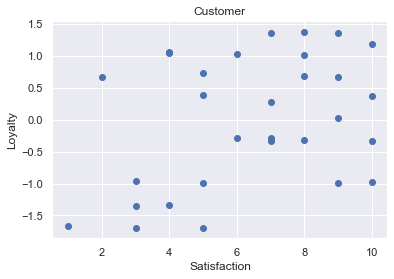

In [10]:
plt.scatter(customer['Satisfaction'], customer['Loyalty'])
plt.title('Customer')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Clustering

In [11]:
kmeans = KMeans(2)
kmeans.fit(customer)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering Results

In [19]:
clusters = customer.copy()
clusters['cluster_prediction'] = kmeans.fit_predict(customer)
clusters

,Satisfaction,Loyalty,cluster_prediction
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


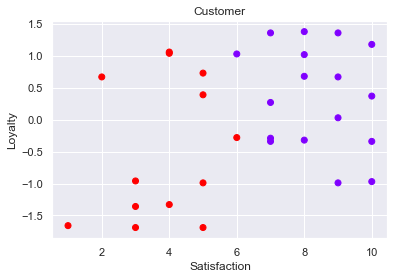

In [20]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_prediction'], cmap='rainbow')
plt.title('Customer')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Standardize the Variables

In [23]:
x_scaled = preprocessing.scale(customer)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take Advantage of the Elbow Method

In [24]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iteration = kmeans.inertia_
    wcss.append(kmeans.inertia_)
    
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.85810442178556,
 6.54983679159933,
 5.363006425346784,
 4.4343096365360966,
 3.8430322397539265,
 3.330393822764398]

In [30]:
for i in range(0, 10):
    if i != 0:
        print(i + 1, 'clusters: ', wcss[i])
    else:
        print(i + 1, 'cluster: ', wcss[i])

1 cluster:  60.0
2 clusters:  29.818973034723147
3 clusters:  17.913349527387965
4 clusters:  10.247181805928422
5 clusters:  7.85810442178556
6 clusters:  6.54983679159933
7 clusters:  5.363006425346784
8 clusters:  4.4343096365360966
9 clusters:  3.8430322397539265
10 clusters:  3.330393822764398


## The Elbow Method

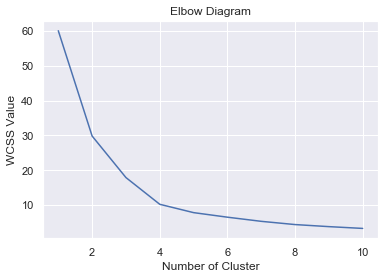

In [31]:
number_of_clusters = range(1, 11)
plt.plot(number_of_clusters, wcss)
plt.title('Elbow Diagram')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS Value')
plt.show()

## Advanced Clustering

In [42]:
kmeans = KMeans(5)
kmeans.fit(x_scaled)

clusters['cluster_prediction'] = kmeans.fit_predict(x_scaled)
clusters

,Satisfaction,Loyalty,cluster_prediction
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,1
7,8,-0.32,3
8,8,1.02,4
9,8,0.68,4


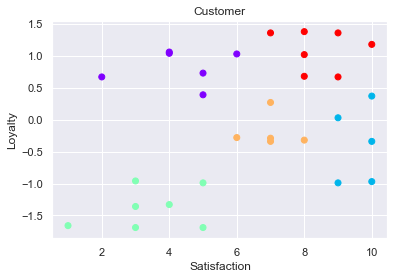

In [43]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_prediction'], cmap='rainbow')
plt.title('Customer')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()